In [1]:
import numpy as np
import pandas as pd 

In [2]:
X = pd.read_csv('./datasets/X_opening.csv')

In [3]:
y = X['worldwide_gross']

In [4]:
X = X.drop('worldwide_gross', axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [6]:
print(len(X))
print(len(X_train))
print(len(X_test))

2221
1332
889


In [7]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0


In [8]:
from sklearn.linear_model import  Lasso
model = Lasso()

In [9]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
predicted = model.predict(X_test)

In [11]:
predicted.shape

(889,)

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline

([array([   1.,    0.,  633.,  199.,   38.,   10.,    6.,    2.,    0.,    0.]),
  array([   0.,    0.,  644.,  184.,   35.,   18.,    5.,    1.,    1.,    1.])],
 array([ -7.30996263e+08,  -4.37135070e+08,  -1.43273877e+08,
          1.50587316e+08,   4.44448510e+08,   7.38309703e+08,
          1.03217090e+09,   1.32603209e+09,   1.61989328e+09,
          1.91375447e+09,   2.20761567e+09]),
 <a list of 2 Lists of Patches objects>)

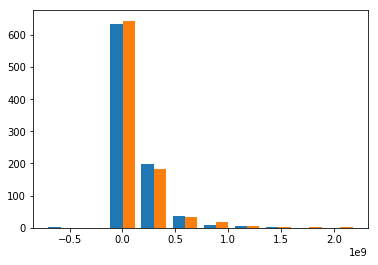

In [14]:
plt.hist([predicted, y_test])

In [15]:
model.score(X_test, y_test)

0.73673394798777969

In [16]:
residuals = y_test - predicted

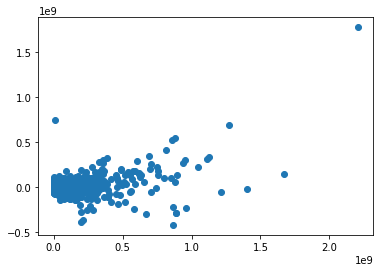

In [17]:
plt.scatter(y_test, residuals)

In [18]:
ap_residuals = np.abs(residuals) / y_test

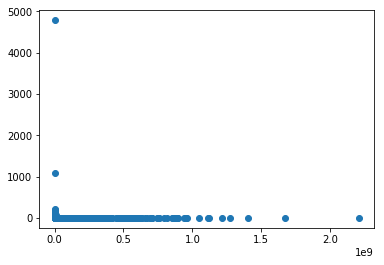

In [19]:
plt.scatter(y_test, ap_residuals)

In [20]:
lap_residuals = np.log(ap_residuals)

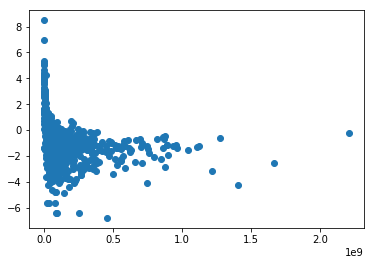

In [21]:
plt.scatter(y_test, lap_residuals)

C:\Users\jean\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


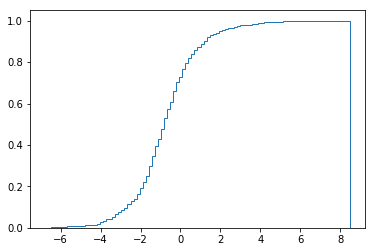

In [22]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative= True);